# Load Feature Engineered Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set() # Setting seaborn as default style even if use only matplotlib
pd.set_option('display.max_rows', None)

In [2]:
import pickle

with open(r'..\data\flight_data_engineered.pickle','rb') as flight_data_file:
     df_flights = pickle.load(flight_data_file)

In [3]:
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,is_holiday,crs_dep_time_hour,crs_dep_time_of_day,crs_arr_time_hour,crs_arr_time_of_day,origin_state,dest_state,origin_region,dest_region,haul
0,2018-01-01,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,...,True,19.0,late afternoon,23.0,evening,NV,OK,West,South,medium
1,2018-01-01,WN,WN,WN,989,WN,N287WN,989,12889,LAS,...,True,21.0,evening,15.0,midday,NV,NE,West,Midwest,medium
2,2018-01-01,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,...,True,6.0,late morning,11.0,midday,NV,NE,West,Midwest,medium
3,2018-01-01,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,...,True,7.0,late morning,8.0,late morning,NV,CA,West,West,short
4,2018-01-01,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,...,True,17.0,late afternoon,18.0,late afternoon,NV,CA,West,West,short


# Check for Missing Values

In [4]:
sum(df_flights.isnull().sum())

0

# Fix DataTypes

In [5]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98363 entries, 0 to 100997
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   fl_date              98363 non-null  datetime64[ns]
 1   mkt_unique_carrier   98363 non-null  object        
 2   branded_code_share   98363 non-null  object        
 3   mkt_carrier          98363 non-null  object        
 4   mkt_carrier_fl_num   98363 non-null  int64         
 5   op_unique_carrier    98363 non-null  object        
 6   tail_num             98363 non-null  object        
 7   op_carrier_fl_num    98363 non-null  int64         
 8   origin_airport_id    98363 non-null  int64         
 9   origin               98363 non-null  object        
 10  origin_city_name     98363 non-null  object        
 11  dest_airport_id      98363 non-null  int64         
 12  dest                 98363 non-null  object        
 13  dest_city_name       98363 non

In [6]:
# fix datatypes for categorical data

df_flights['mkt_carrier_fl_num'] = df_flights['mkt_carrier_fl_num'].astype(str)
df_flights['op_carrier_fl_num'] = df_flights['op_carrier_fl_num'].astype(str)
df_flights['origin_airport_id'] = df_flights['origin_airport_id'].astype(str)
df_flights['dest_airport_id'] = df_flights['dest_airport_id'].astype(str)

In [7]:
df_flights.drop('fl_date', axis = 1, inplace = True)
df_flights.drop('dup', axis = 1, inplace = True)
df_flights.drop('flights', axis = 1, inplace = True)

# Detect / Treat Outliers

In [8]:
df_flights.describe()

,crs_elapsed_time,distance,arr_delay,year,month,day,mean_arr_delay,median_arr_delay,crs_dep_time_hour,crs_arr_time_hour
count,98363.000000,98363.000000,98363.000000,98363.000000,98363.000000,98363.000000,98363.000000,98363.000000,98363.000000,98363.000000
mean,138.808048,775.405905,5.360461,2018.517125,6.608735,15.663268,5.390274,-6.073717,12.992701,14.720993
std,71.672658,586.084342,48.519781,0.499709,3.424142,8.868163,3.195111,1.108931,4.809359,4.912635
min,22.000000,31.000000,-68.000000,2018.000000,1.000000,1.000000,0.508462,-8.000000,2.000000,2.000000
25%,87.000000,347.000000,-15.000000,2018.000000,4.000000,8.000000,2.466155,-7.000000,9.000000,11.000000
50%,120.000000,612.000000,-6.000000,2019.000000,7.000000,16.000000,5.382526,-6.000000,13.000000,15.000000
75%,169.000000,1013.000000,8.000000,2019.000000,10.000000,24.000000,8.901098,-5.000000,17.000000,19.000000
max,679.000000,4983.000000,1516.000000,2019.000000,12.000000,31.000000,10.135397,-5.000000,23.000000,23.000000


In [9]:
df_flights.head()

,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,...,is_holiday,crs_dep_time_hour,crs_dep_time_of_day,crs_arr_time_hour,crs_arr_time_of_day,origin_state,dest_state,origin_region,dest_region,haul
0,WN,WN,WN,5431,WN,N291WN,5431,12889,LAS,"Las Vegas, NV",...,True,19.0,late afternoon,23.0,evening,NV,OK,West,South,medium
1,WN,WN,WN,989,WN,N287WN,989,12889,LAS,"Las Vegas, NV",...,True,21.0,evening,15.0,midday,NV,NE,West,Midwest,medium
2,WN,WN,WN,1664,WN,N751SW,1664,12889,LAS,"Las Vegas, NV",...,True,6.0,late morning,11.0,midday,NV,NE,West,Midwest,medium
3,WN,WN,WN,1106,WN,N704SW,1106,12889,LAS,"Las Vegas, NV",...,True,7.0,late morning,8.0,late morning,NV,CA,West,West,short
4,WN,WN,WN,1559,WN,N423WN,1559,12889,LAS,"Las Vegas, NV",...,True,17.0,late afternoon,18.0,late afternoon,NV,CA,West,West,short


In [10]:
def uni_analyis_continuous(df, feature, feature_title):
    
    import matplotlib.pyplot as plt
    import matplotlib.transforms as mtrans

    fig, axes = plt.subplots(1,2, sharex=False, figsize=(10,5))
    fig.suptitle(f'Univariate Analysis - {feature_title}')

    sns.boxplot(ax=axes[0], data=df[feature])
    axes[0].set_title(f'{feature_title} Boxplot')
    sns.histplot(ax=axes[1], data=df[feature])
    axes[1].set_title(f'{feature_title} Histogram')

    Minimum = min(df[feature])
    Median = df[feature].median()
    Mean = df[feature].mean()
    Maximum = max(df[feature])
    
    trans = mtrans.blended_transform_factory(fig.transFigure, mtrans.IdentityTransform())

    txt = fig.text(0.5,10, f'Minimum : {Minimum}, Median : {Median}, Mean : {Mean}, Maximum : {Maximum}', ha='center', va='center_baseline')
    txt.set_transform(trans)

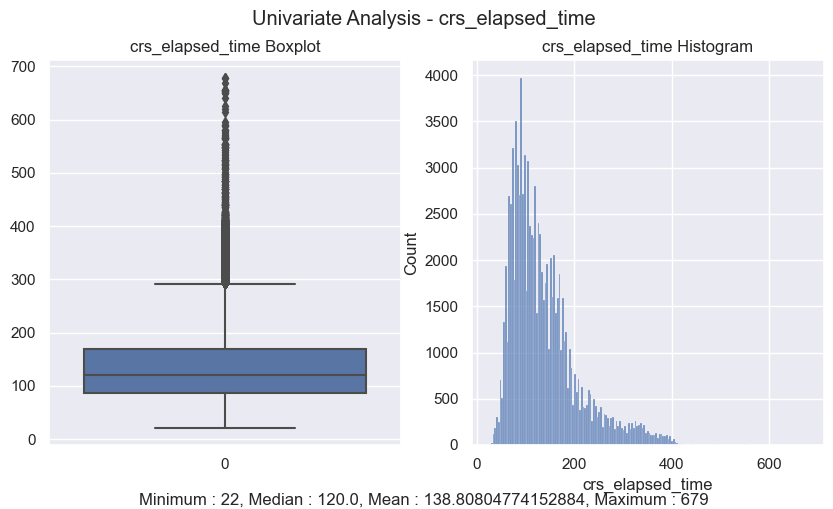

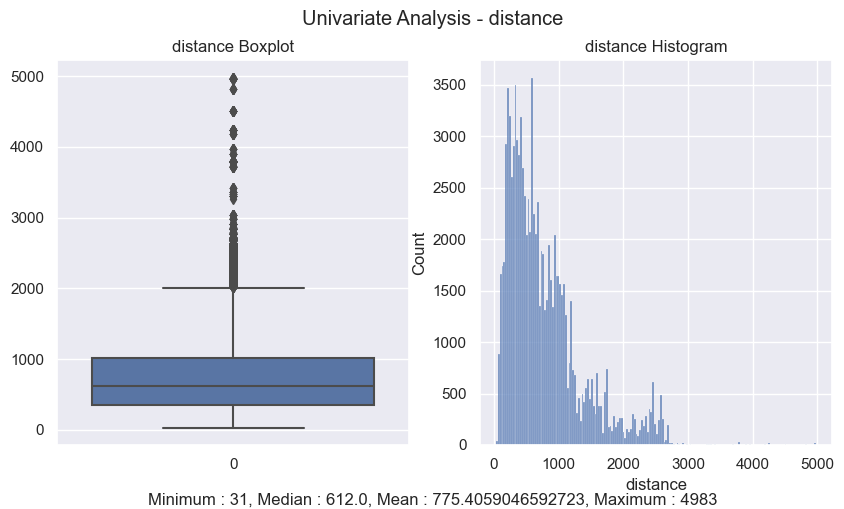

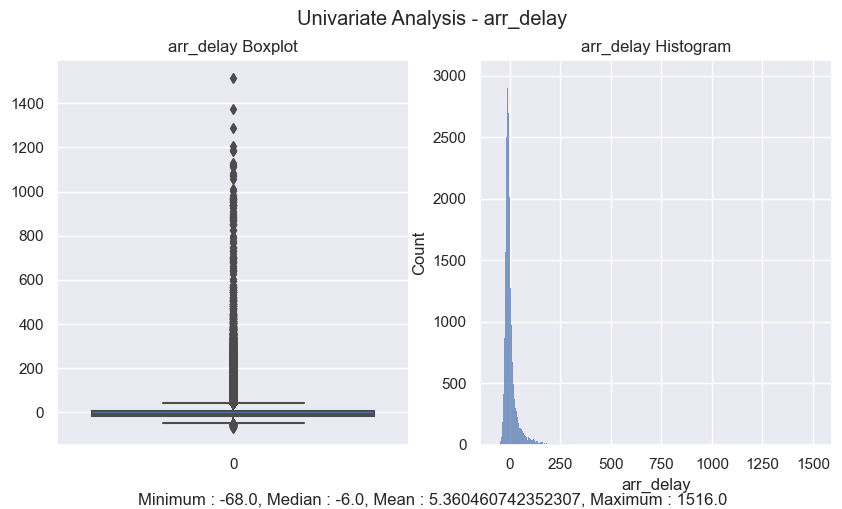

In [11]:
for feat in ['crs_elapsed_time','distance','arr_delay']:
    uni_analyis_continuous(df_flights, feature=feat, feature_title=feat)

In [12]:
from scipy import stats
import numpy as np

#Finding Z Score on Column
stats.zscore(df_flights['crs_elapsed_time'])

# Turning Absolute
np.abs(stats.zscore(df_flights['crs_elapsed_time']))

# view the outliers
outliers = df_flights['crs_elapsed_time'][(np.abs(stats.zscore(df_flights['crs_elapsed_time'])) > 3)]

# drop outliers
df_flights.drop(outliers.index, inplace=True)

In [13]:
from scipy import stats
import numpy as np

#Finding Z Score on Column
stats.zscore(df_flights['distance'])

# Turning Absolute
np.abs(stats.zscore(df_flights['distance']))

# view the outliers
outliers = df_flights['distance'][(np.abs(stats.zscore(df_flights['distance'])) > 3)]

# # drop outliers
df_flights.drop(outliers.index, inplace=True)

In [14]:
from scipy import stats
import numpy as np

#Finding Z Score on Column
stats.zscore(df_flights['arr_delay'])

# Turning Absolute
np.abs(stats.zscore(df_flights['arr_delay']))

# view the outliers
outliers = df_flights['arr_delay'][(np.abs(stats.zscore(df_flights['arr_delay'])) > 3)]

# drop outliers
df_flights.drop(outliers.index, inplace=True)

In [15]:
# do log transformation of 'crs_elapsed_time','distance','arr_delay'

df_flights['crs_elapsed_time_log'] = np.log(df_flights['crs_elapsed_time'])
df_flights['distance_log'] = np.log(df_flights['distance'])
# df_flights['arr_delay_log'] = np.log(df_flights['arr_delay'])

In [16]:
df_flights.drop('crs_elapsed_time', axis = 1, inplace = True)
df_flights.drop('distance', axis = 1, inplace = True)
# df_flights.drop('arr_delay', axis = 1, inplace = True)


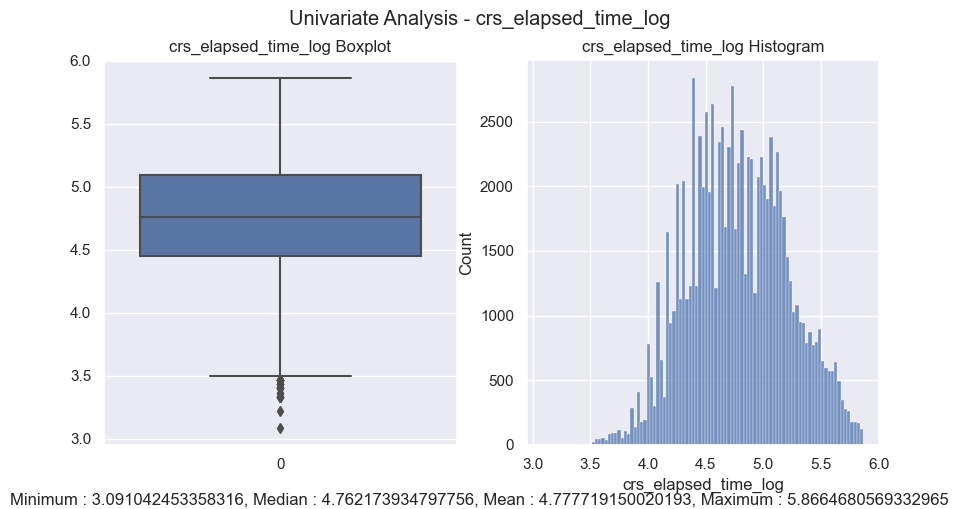

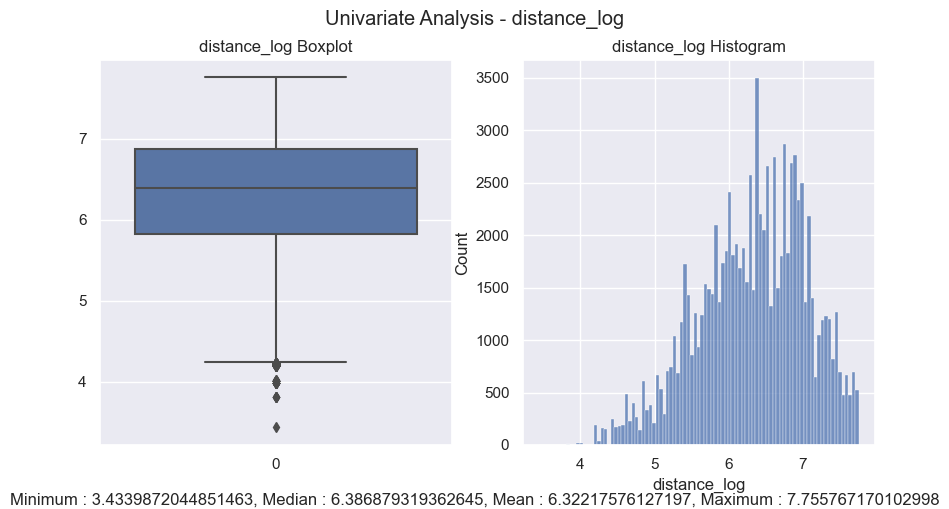

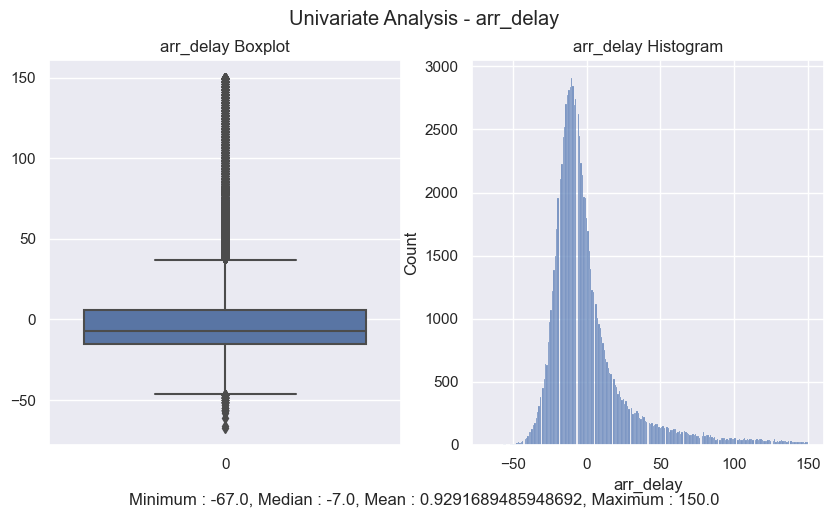

In [17]:
for feat in ['crs_elapsed_time_log','distance_log','arr_delay']:
    uni_analyis_continuous(df_flights, feature=feat, feature_title=feat)

# Transform Categorical Variables into Numeric Data

In [18]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93123 entries, 0 to 100997
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   mkt_unique_carrier    93123 non-null  object        
 1   branded_code_share    93123 non-null  object        
 2   mkt_carrier           93123 non-null  object        
 3   mkt_carrier_fl_num    93123 non-null  object        
 4   op_unique_carrier     93123 non-null  object        
 5   tail_num              93123 non-null  object        
 6   op_carrier_fl_num     93123 non-null  object        
 7   origin_airport_id     93123 non-null  object        
 8   origin                93123 non-null  object        
 9   origin_city_name      93123 non-null  object        
 10  dest_airport_id       93123 non-null  object        
 11  dest                  93123 non-null  object        
 12  dest_city_name        93123 non-null  object        
 13  crs_dep_time   

In [19]:
# <class 'pandas.core.frame.DataFrame'>
# Int64Index: 93123 entries, 0 to 100997
# Data columns (total 36 columns):
#  #   Column                Non-Null Count  Dtype         
# ---  ------                --------------  -----         
#  0   mkt_unique_carrier    93123 non-null  object        
#  1   branded_code_share    93123 non-null  object        
#  2   mkt_carrier           93123 non-null  object        
#  3   mkt_carrier_fl_num    93123 non-null  object        
#  4   op_unique_carrier     93123 non-null  object        
#  5   tail_num              93123 non-null  object        
#  6   op_carrier_fl_num     93123 non-null  object        
#  7   origin_airport_id     93123 non-null  object        
#  8   origin                93123 non-null  object        
#  9   origin_city_name      93123 non-null  object        
#  10  dest_airport_id       93123 non-null  object        
#  11  dest                  93123 non-null  object        
#  12  dest_city_name        93123 non-null  object        
#  13  crs_dep_time          93123 non-null  datetime64[ns]
#  14  crs_arr_time          93123 non-null  datetime64[ns]
#  15  year                  93123 non-null  int64         
#  16  month                 93123 non-null  int64         
#  17  day                   93123 non-null  int64         
#  18  mean_arr_delay        93123 non-null  float64       
#  19  median_arr_delay      93123 non-null  float64       
#  20  season                93123 non-null  object        
#  21  day_of_week           93123 non-null  object        
#  22  is_weekend            93123 non-null  bool          
#  23  is_holiday            93123 non-null  bool          
#  24  crs_dep_time_hour     93123 non-null  float64       
#  25  crs_dep_time_of_day   93123 non-null  category      
#  26  crs_arr_time_hour     93123 non-null  float64       
#  27  crs_arr_time_of_day   93123 non-null  category      
#  28  origin_state          93123 non-null  object        
#  29  dest_state            93123 non-null  object        
#  30  origin_region         93123 non-null  object        
#  31  dest_region           93123 non-null  object        
#  32  haul                  93123 non-null  category      
#  33  crs_elapsed_time_log  93123 non-null  float64       
#  34  distance_log          93123 non-null  float64       
#  35  arr_delay_log         33133 non-null  float64       
# dtypes: bool(2), category(3), datetime64[ns](2), float64(7), int64(3), object(19)
# memory usage: 25.2+ MB

### Iteration 1

In [20]:
#  20  season                93123 non-null  object

In [21]:
df_iteration1 = df_flights[['season',
 'arr_delay',
 ]]

In [22]:
df_iteration1 = pd.get_dummies(df_iteration1, columns = ['season'])

In [23]:
df_iteration1.head()

,arr_delay,season_Fall,season_Spring,season_Summer,season_Winter
0,19.0,0,0,0,1
1,46.0,0,0,0,1
2,-9.0,0,0,0,1
3,-3.0,0,0,0,1
4,37.0,0,0,0,1


In [24]:
# # make a pickle of the feature engineered data
# import pickle

# #Do Some Feature Engineering
# iteration1 = df_iteration1

# #Dump it(save it in binary format)
# with open('iteration1.pickle','wb') as flight_data_file:
#      pickle.dump(iteration1, flight_data_file)

### Iteration 2

In [25]:
#  20  season                93123 non-null  object
#  25  crs_dep_time_of_day   93123 non-null  category

In [26]:
df_iteration2 = df_flights[['season','crs_dep_time_of_day',
 'arr_delay',
 ]]

In [27]:
df_iteration2 = pd.get_dummies(df_iteration2, columns = ['season','crs_dep_time_of_day'])

In [28]:
df_iteration2.head()

,arr_delay,season_Fall,season_Spring,season_Summer,season_Winter,crs_dep_time_of_day_early morning,crs_dep_time_of_day_late morning,crs_dep_time_of_day_midday,crs_dep_time_of_day_late afternoon,crs_dep_time_of_day_evening
0,19.0,0,0,0,1,0,0,0,1,0
1,46.0,0,0,0,1,0,0,0,0,1
2,-9.0,0,0,0,1,0,1,0,0,0
3,-3.0,0,0,0,1,0,1,0,0,0
4,37.0,0,0,0,1,0,0,0,1,0


In [29]:
# # make a pickle of the feature engineered data
# import pickle

# #Do Some Feature Engineering
# iteration2 = df_iteration2

# #Dump it(save it in binary format)
# with open('iteration2.pickle','wb') as flight_data_file:
#      pickle.dump(iteration2, flight_data_file)

### Iteration 3

In [30]:
#  20  season                93123 non-null  object
#  25  crs_dep_time_of_day   93123 non-null  category
#  27  crs_arr_time_of_day   93123 non-null  category

In [31]:
df_iteration3 = df_flights[['season','crs_dep_time_of_day','crs_arr_time_of_day',
 'arr_delay',
 ]]

In [32]:
df_iteration3 = pd.get_dummies(df_iteration3, columns = ['season','crs_dep_time_of_day','crs_arr_time_of_day'])

In [34]:
# # make a pickle of the feature engineered data
# import pickle

# #Do Some Feature Engineering
# iteration3 = df_iteration3

# #Dump it(save it in binary format)
# with open('iteration3.pickle','wb') as flight_data_file:
#      pickle.dump(iteration3, flight_data_file)

### Iteration 4

In [37]:
#  20  season                93123 non-null  object
#  25  crs_dep_time_of_day   93123 non-null  category
#  27  crs_arr_time_of_day   93123 non-null  category
#  30  origin_region         93123 non-null  object 

In [38]:
df_iteration4 = df_flights[['season','crs_dep_time_of_day','crs_arr_time_of_day','origin_region',
 'arr_delay',
 ]]

In [39]:
df_iteration4 = pd.get_dummies(df_iteration4, columns = ['season','crs_dep_time_of_day','crs_arr_time_of_day','origin_region'])

In [40]:
# # make a pickle of the feature engineered data
# import pickle

# #Do Some Feature Engineering
# iteration4 = df_iteration4

# #Dump it(save it in binary format)
# with open('iteration4.pickle','wb') as flight_data_file:
#      pickle.dump(iteration4, flight_data_file)